<b> Sreeram Joins The Party </b>
<br>
<br>
This is my Solution to the famous Titanic Problem in Kaggle 

In [10]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100

In [9]:
data = pd.read_csv('train.csv')
# Removing the unnecessay features from the dataset
data = data.drop(['Ticket','Cabin'],axis=1)
data = data.dropna()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


<b> Now Let's Visualise the Data </b>

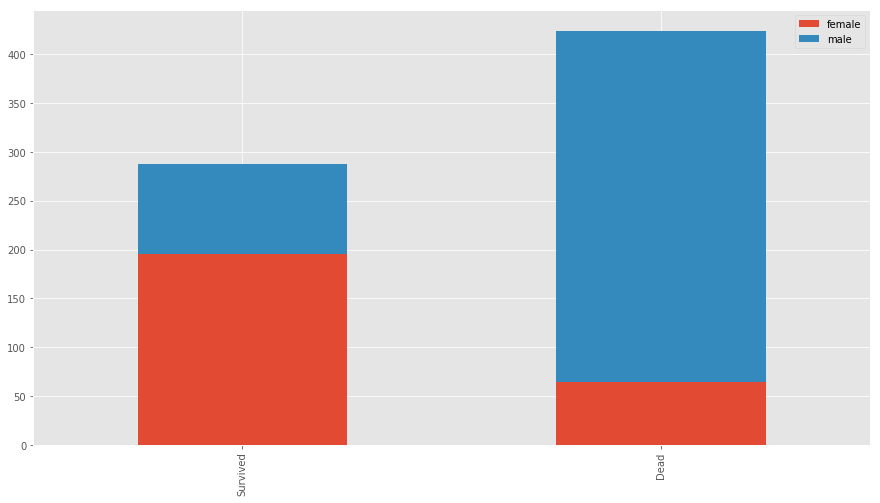

In [11]:
import pylab
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))
pylab.show()

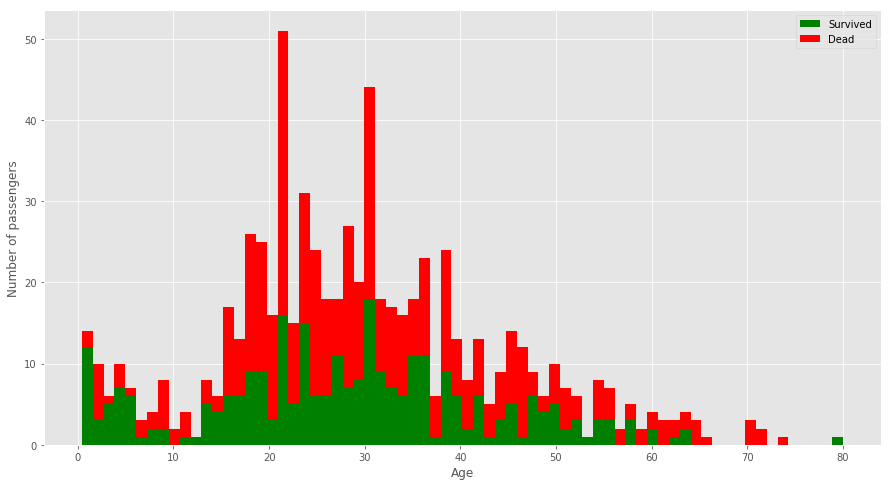

In [17]:
#AGE VS SURVIVAL RATE
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'],
         bins = 70,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

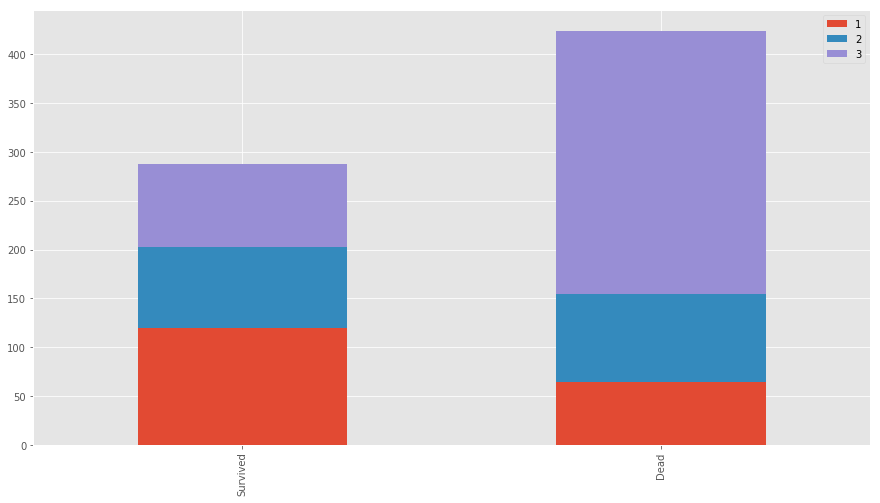

In [18]:
#TICKET CLASS VS SURVIVAL RATE
survived_class =  data[data['Survived'] == 1]['Pclass'].value_counts()
dead_class = data[data['Survived'] ==0 ]['Pclass'].value_counts()
df = pd.DataFrame([survived_class,dead_class])
df.index = ['Survived','Dead']
df.plot(kind = 'bar',stacked = True , figsize = (15,8))
pylab.show()

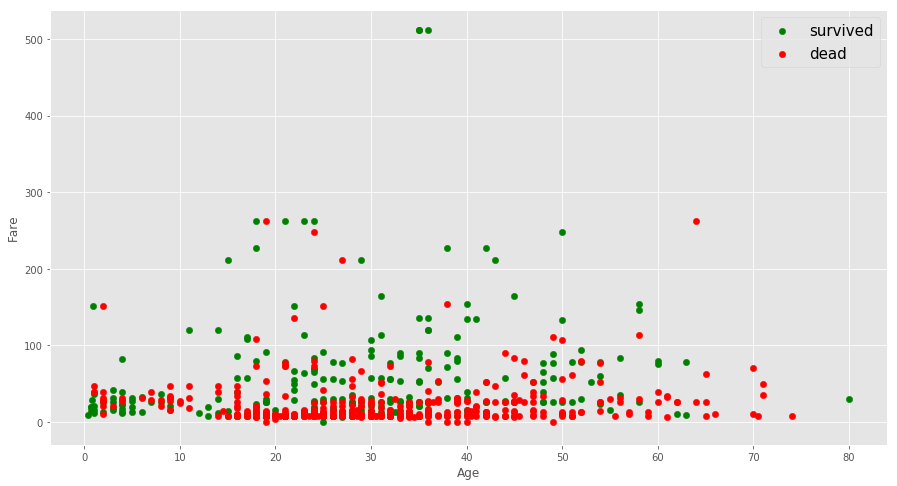

In [21]:
#Draawing a 2D Plot of Age vs Fare
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'],data[data['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

In [40]:
def get_combined_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')    
    # Isolating the Answer and removing them
    targets = train.Survived
    train.drop('Survived',1,inplace = True)
    #Combining the Test and Training Data Together
    combined = train.append(test)
    #print (combined)
    combined.reset_index(inplace = True)
    combined.drop('index', inplace=True, axis=1)
    return combined

In [41]:
combined = get_combined_data()
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
def get_title():
    global combined
    for i in combined:
        print (combined['Name'])
get_title()

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
5                                        Moran, Mr. James
6                                 McCarthy, Mr. Timothy J
7                          Palsson, Master. Gosta Leonard
8       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                     Nasser, Mrs. Nicholas (Adele Achem)
10                        Sandstrom, Miss. Marguerite Rut
11                               Bonnell, Miss. Elizabeth
12                         Saundercock, Mr. William Henry
13                            Andersson, Mr. Anders Johan
14                   Vestrom, Miss. Hulda Amanda Adolfina
15                       Hewlett, Mrs. (Mary D Kingcome) 
16                                   Rice, Master. Eugene
17            